In [6]:
import os
import json
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [8]:
def clean(data):
    for k1 in data.keys():
        for k2 in data[k1].keys():
            se = stats.sem([float(x) for x in data[k1][k2]])
            print(f'''Std Err: {k1}, {k2}, {se}''')
            data[k1][k2] = round(st.mean([float(x) for x in data[k1][k2]]), 4)
    return data

In [9]:
def add_values():
    vals = {}
    kstrings = []
    target = 'large'
    dirs = sorted(os.listdir(os.path.join(os.getcwd(), target)))
    for file in dirs:
#         print(file)
        if file == '.DS_Store':
            continue
#         f = open(os.path.join(target, file), 'r')
#         data = json.load(f)
#         f.close()
        filez = file.split(':')
        n = ''.join([x for x in filez[2] if x.isdigit()])
        m = ''.join([x for x in filez[3] if x.isdigit()])
        kstring = n + ', ' + m
        kstrings.append(kstring)
    
    for kstring in kstrings:
        vals[kstring] = {'ground': {'p': [], 'r': [], 'f': []}, 'bcc': {'p': [], 'r': [], 'f': []}}
        
    for file in dirs:
#         print(file)
        if file == '.DS_Store':
            continue
        f = open(os.path.join(target, file), 'r')
        data = json.load(f)
        f.close()
        filez = file.split(':')
        n = ''.join([x for x in filez[2] if x.isdigit()])
        m = ''.join([x for x in filez[3] if x.isdigit()])
        kstring = n + ', ' + m
        print(kstring)
        data = clean(data)
        vals[kstring]['ground']['p'].append(data['ground']['p'])
        vals[kstring]['ground']['r'].append(data['ground']['r'])
        vals[kstring]['ground']['f'].append(data['ground']['f'])
        vals[kstring]['bcc']['p'].append(data['bcc']['p'])
        vals[kstring]['bcc']['r'].append(data['bcc']['r'])
        vals[kstring]['bcc']['f'].append(data['bcc']['f'])
    print(vals)
    return vals

In [10]:
vals = add_values()

5000, 3
Std Err: ground, p, 0.0
Std Err: ground, r, 0.003640249213996207
Std Err: ground, f, 0.006962265438777811
Std Err: bcc, p, 2.7755575615628914e-17
Std Err: bcc, r, 0.0
Std Err: bcc, f, 0.0
5000, 3
Std Err: ground, p, 0.0
Std Err: ground, r, 0.05299209784901896
Std Err: ground, f, 0.0650368762998347
Std Err: bcc, p, 0.0
Std Err: bcc, r, 0.0
Std Err: bcc, f, 0.0
{'5000, 3': {'ground': {'p': [1.0, 1.0], 'r': [0.0189, 0.2406], 'f': [0.0371, 0.3768]}, 'bcc': {'p': [0.4299, 0.4299], 'r': [1.0, 1.0], 'f': [0.6013, 0.6013]}}}


<class 'matplotlib.axes._subplots.AxesSubplot'>
5000, 3 ground p
[1.0, 1.0]
---------------
<class 'matplotlib.axes._subplots.AxesSubplot'>
5000, 3 ground r
[0.0189, 0.2406]
---------------
<class 'matplotlib.axes._subplots.AxesSubplot'>
5000, 3 ground f
[0.0371, 0.3768]
---------------


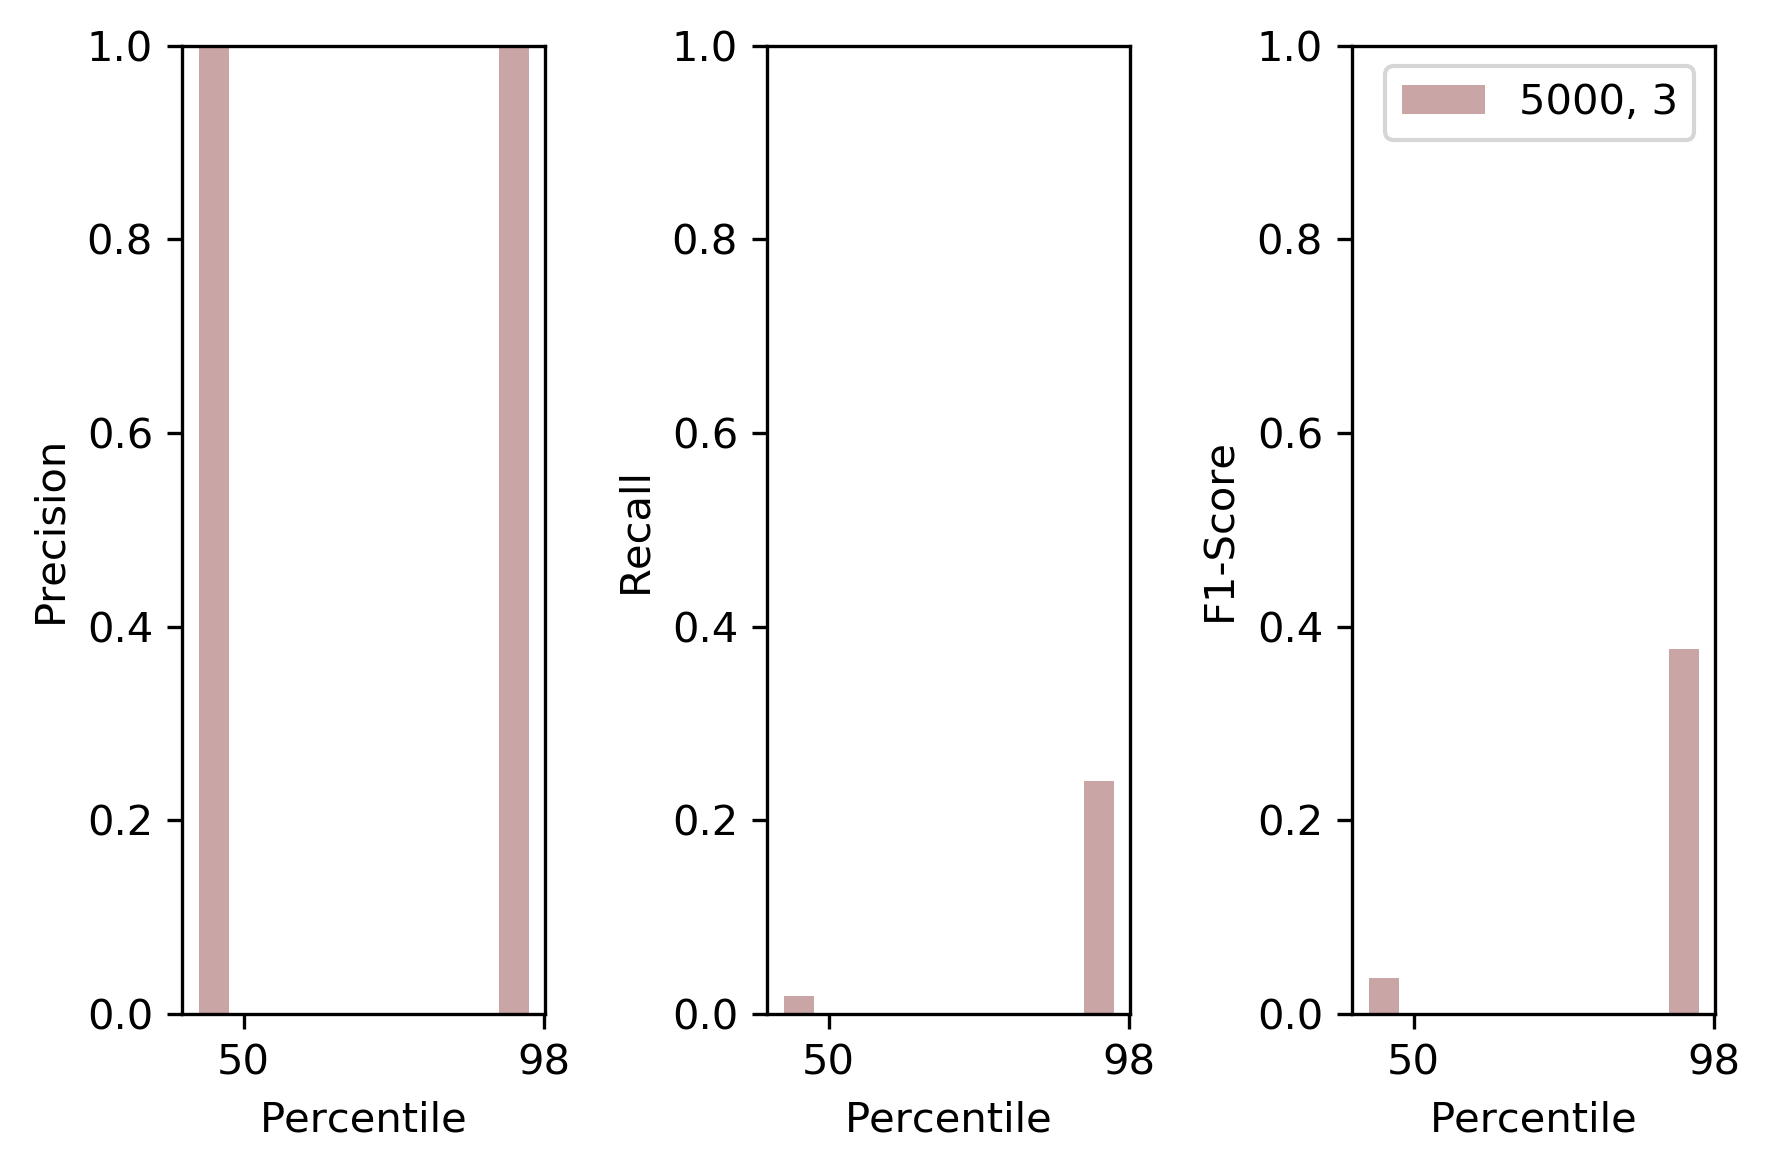

<class 'matplotlib.axes._subplots.AxesSubplot'>
5000, 3 bcc p
[0.4299, 0.4299]
---------------
<class 'matplotlib.axes._subplots.AxesSubplot'>
5000, 3 bcc r
[1.0, 1.0]
---------------
<class 'matplotlib.axes._subplots.AxesSubplot'>
5000, 3 bcc f
[0.6013, 0.6013]
---------------


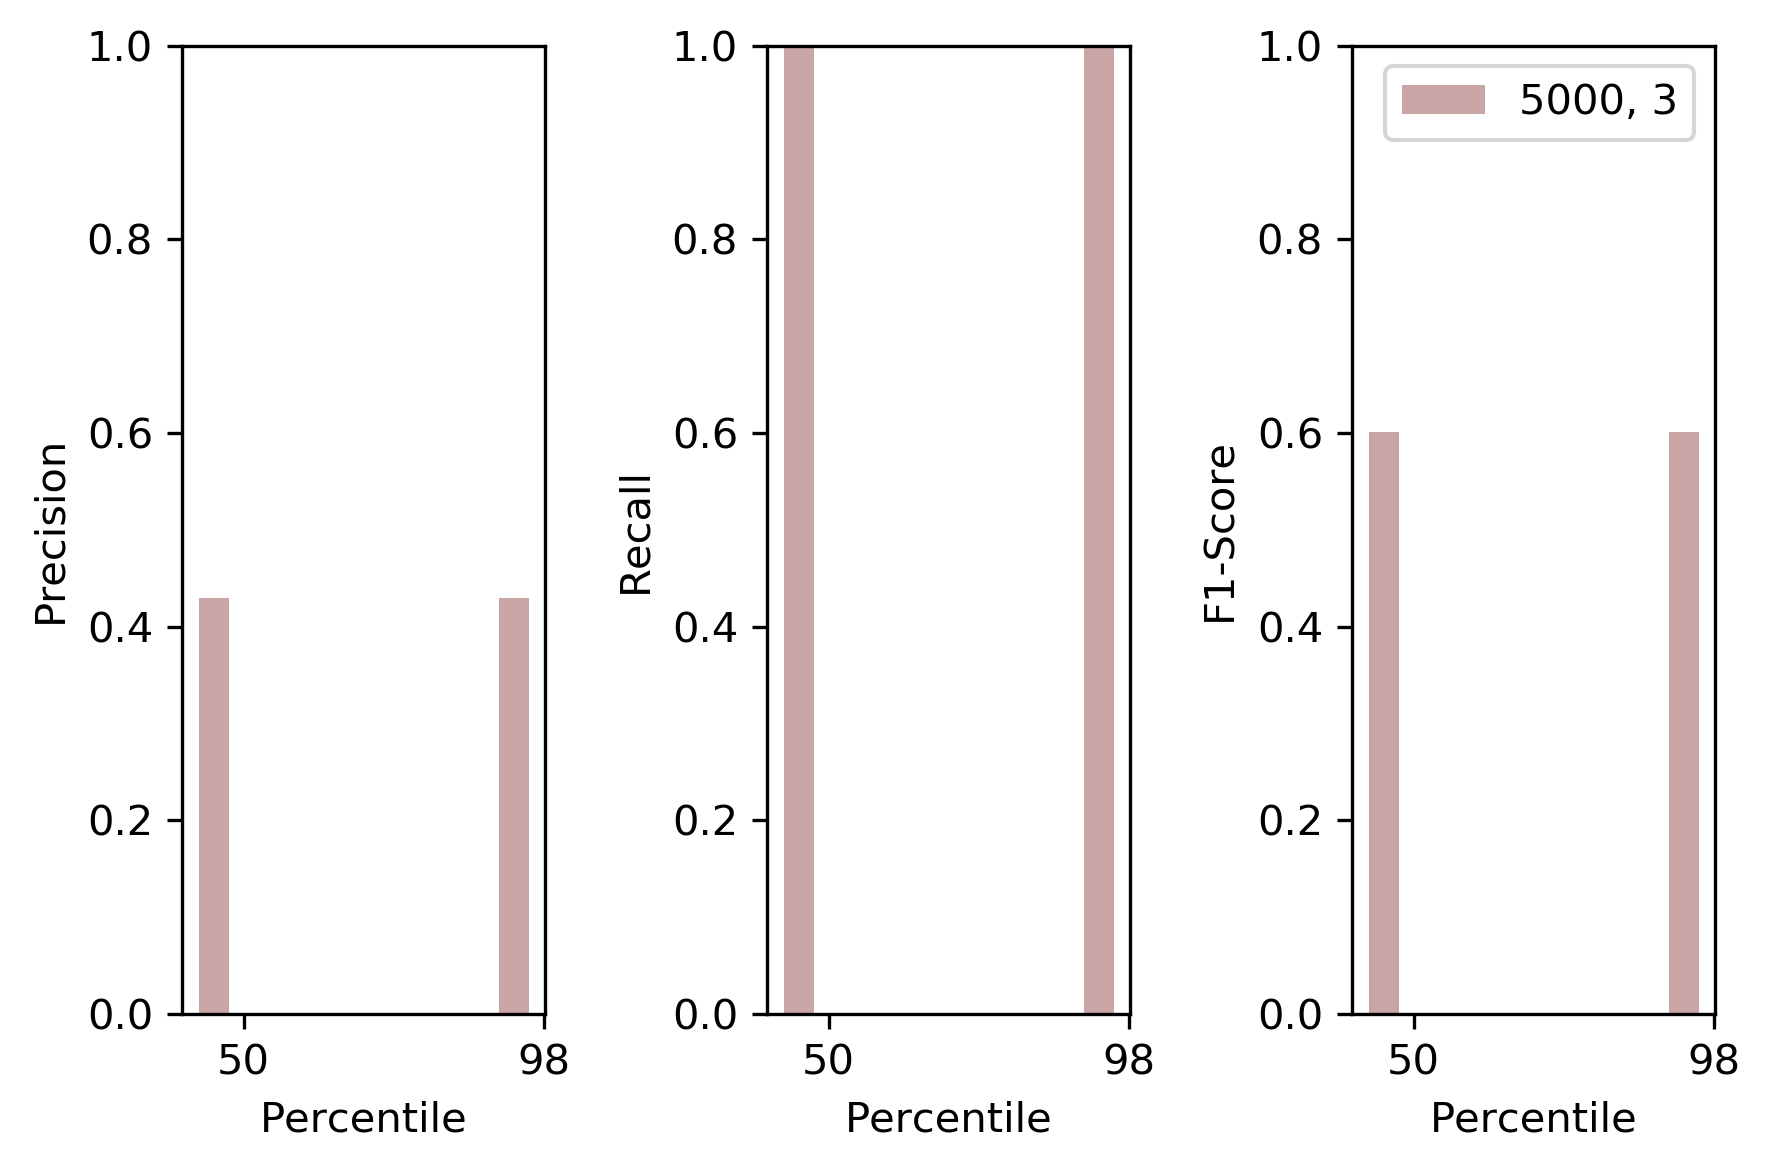

In [13]:
for kind in ['ground', 'bcc']:
    
    n_groups = 2
    fig, ax = plt.subplots(nrows=1, ncols=3)
    
    # plt.xlabel('Percentile')
    ax1, ax2, ax3 = ax.flatten()
    index = np.arange(n_groups)
    bar_width = 0.10
    opacity = 0.8
    ax1.set_ylabel('Precision')
    ax2.set_ylabel('Recall')
    ax3.set_ylabel('F1-Score')

    ax1.set_xlabel('Percentile')
    ax2.set_xlabel('Percentile')
    ax3.set_xlabel('Percentile')
#     plt.ylim(0.0, 1.0)
    # print(type(ax1))

    plt.get_fignums()
    
    measures = ['p', 'r', 'f']
    axes = [ax1, ax2, ax3]
    tup = zip(axes, measures)
    for ax, measure in tup:
        print (type(ax))
        
        ax.set_ylim(0.0, 1.0)
        
        
        m5000_3 = vals['5000, 3'][kind][measure]
        print(f'''5000, 3 {kind} {measure}''')
        print(vals['5000, 3'][kind][measure])
        print('---------------')
        
         
#         rects1 = ax.bar(index, m200_3, bar_width,
#                          alpha=opacity,
#                          color='darkgreen',
#                          label='200, 3')
#         rects2 = ax.bar(index + bar_width, m200_5, bar_width,
#                          alpha=opacity,
#                          color='forestgreen',
#                          label='200, 5')
#         rects3 = ax.bar(index + 2*bar_width, m200_10, bar_width,
#                          alpha=opacity,
#                          color='limegreen',
#                          label='200, 10')
        rects4 = ax.bar(index, m5000_3, bar_width,
                         alpha=opacity,
                         color='rosybrown',
                         label='5000, 3')
        
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels([50, 98])
        
    handles, labels = ax.get_legend_handles_labels()
    box = ax.get_position()
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig(fname=kind + ' large.png', format='png')
    plt.show()
    